In [1]:
import numpy as np  # 调用numpy
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  ###防止无法显示中文并设置黑体
air_hgt_500 = xr.open_dataset('D:\\python\\tianzhen\\shixi2\\all.nc')
lat = air_hgt_500['lat'][:]
lon = air_hgt_500['lon'][:]
lons, lats = np.meshgrid(lon, lat)  # 后面画图数据对应

In [3]:
def createmap():
    ####生成地图#########
    box = [50, 160, 10, 80]  # 经度维度
    scale = '110m'  # 地图分辨率
    xstep = 10  # 下面标注经纬度的步长
    ystep = 10
    proj = ccrs.PlateCarree()
    fig = plt.figure(figsize=(8, 10))  # dpi=150)###生成底图
    ax = fig.subplots(1, 1, subplot_kw={'projection': proj})

    ax.set_extent(box, crs=ccrs.PlateCarree())
    ##设置大陆的颜色，1为白，0为黑
    # land=cfeat.NaturalEarthFeature('physical','land',scale,edgecolor='face',facecolor=cfeat.COLORS['land'])
    # ax.add_feature(land,facecolor='0.75')
    ##海岸线
    ax.coastlines(scale)
    # 标注坐标轴
    ax.set_xticks(np.arange(box[0], box[1] + xstep, xstep), crs=ccrs.PlateCarree())
    ax.set_yticks(np.arange(box[2], box[3] + ystep, ystep), crs=ccrs.PlateCarree())
    # 经纬度格式，把0经度设置不加E和W
    lon_formatter = LongitudeFormatter(zero_direction_label=False)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

    return ax,fig

D:\anaconda\lib\site-packages\cartopy\mpl\geoaxes.py:1478: UserWarning: The following kwargs were not used by contour: 'linestyle'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


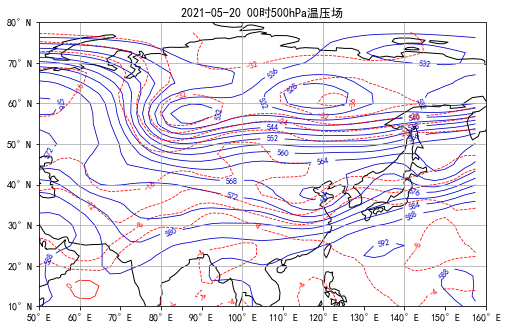

In [4]:
ax,fig=createmap()
###绘制500hPa温压场
###读取数据
plot_air_500 = air_hgt_500['air'][0, 5, :, :]
plot_hgt_500 = air_hgt_500['hgt'][0, 5, :, :]

air_levels = np.arange(-100, 20, 4)  # 设置等值线间隔
hgt_levels = np.arange(400, 600, 4)
#
denghgtlines = ax.contour(lons[0:28, 0:44], lats[0:28, 0:44], plot_hgt_500[0:28, 0:44], levels=hgt_levels,
                          colors='mediumblue', linewidths=0.8)

plt.clabel(denghgtlines, inline=True, fontsize=8, fmt='%.0f')
dengairlines = ax.contour(lons[0:28, 0:44], lats[0:28, 0:44], plot_air_500[0:28, 0:44], levels=air_levels,
                          colors='red', linewidths=0.8, linestyle=np.where(plot_air_500 <= 0, '--', '-'))
plt.clabel(dengairlines, inline=True, fontsize=8, fmt='%.0f')
ax.set_title('2021-05-20 00时500hPa温压场', fontsize=12)

gl = ax.gridlines()  ##生成网格线
ax.grid()
plt.show()